# Cars Accident Severity Prediction

By: Angga Bayu Prakhosha

Goal: Make a classifier for severity accident

Data: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

Last Updated: 
 
This project is part of Data Science Capstone by Coursera. In this project, I try to classify car accident based on its severity. The severity of an accident can be classified into 4 categories: 

1. 0 = Unknown
2. 1, = Prop damage
3. 2 = Injury
4. 2b = Serious injury
5. 3 = Fatality

In this notebook, I try to use these variables as the features for the classifier:

1. X : X coordinate
2. Y : Y coordinate
3. ADDRTYPE : Collision address type: Alley, Block, Intersection.
4. PERSONCOUNT : The total number of people involved in the collision.
5. PEDCOUNT : The number of pedestrians involved in the collision.
6. PEDCYLCOUNT : The number of bicycles involved in the collision.
7. VEHCOUNT : The number of vehicles involved in the collision. 
8. INJURIES : The number of total injuries in the collision.
9. SERIOUSINJURIES : The number of serious injuries in the collision.
10. FATALITIES : The number of fatalities in the collision.
11. JUNCTIONTYPE : Category of junction at which collision took place.
12. INATTENTIONIND : Whether or not collision was due to inattention.
13. UNDERINFL : Whether or not a driver involved was under the influence of drugs or alcohol.

The rest of the attributes is described on this website: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
data = pd.read_csv('Data-Collisions.csv')
data.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [62]:
data.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [53]:
data['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

## Data Preparation

In [32]:
features = ['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SEVERITYCODE']

df = data[features]
df.head()

,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,SEVERITYCODE
0,-122.356511,47.517361,Intersection,2,0,0,2,0,0,0,At Intersection (intersection related),NaN,N,1
1,-122.361405,47.702064,Block,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Y,0,1
2,-122.317414,47.664028,Block,2,0,0,2,1,0,0,Mid-Block (not related to intersection),NaN,N,2
3,-122.318234,47.619927,Intersection,3,1,0,1,1,0,0,At Intersection (intersection related),NaN,N,2
4,-122.351724,47.560306,Block,2,0,0,1,1,0,0,Mid-Block (not related to intersection),NaN,0,2


Remove any missing data, but first we have to convert 'NaN' in INATTENTIONIND to 0 and also change 'Y' to 1. We should also change 'N' in 'UNDERINFL' to 0 and 'Y' to 1.

In [33]:
df['INATTENTIONIND'].fillna(0, inplace=True)
df["INATTENTIONIND"].replace('Y', 1, inplace=True)
df["UNDERINFL"].replace('Y', 1, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)

c:\users\angga bayu prakhosha\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\angga bayu prakhosha\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Remove any missing values

In [34]:
df = df[df['JUNCTIONTYPE'] != 'Unknown']
df = df[df['SEVERITYCODE'] != 0]
df.dropna(inplace=True)

We should also encode our categorical data so that it can be fed into the model

In [35]:
from sklearn.preprocessing import LabelEncoder

ADDRTYPE_encoder = LabelEncoder()
JUNCTIONTYPE_encoder = LabelEncoder()
TARGET_encoder = LabelEncoder()
df['ADDRTYPE'] = ADDRTYPE_encoder.fit_transform(df['ADDRTYPE'])
df['JUNCTIONTYPE'] = JUNCTIONTYPE_encoder.fit_transform(df['JUNCTIONTYPE'])
df['SEVERITYCODE'] = TARGET_encoder.fit_transform(df['SEVERITYCODE'])

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['X', 'Y']] = scaler.fit_transform(df[['X', 'Y']])

Our final data would look like this

In [37]:
df.head()

,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,SEVERITYCODE
0,0.347395,0.091330,1,2,0,0,2,0,0,0,1,0,0.0,1
1,0.320227,0.865540,0,2,0,0,2,0,0,0,4,1,0.0,1
2,0.564431,0.706105,0,2,0,0,2,1,0,0,4,0,0.0,2
3,0.559877,0.521251,1,3,1,0,1,1,0,0,1,0,0.0,2
4,0.373967,0.271340,0,2,0,0,1,1,0,0,4,0,0.0,2


## Model Creation

In [44]:
from sklearn.model_selection import train_test_split

attributes = ['X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL']
target = 'SEVERITYCODE'

X_train, X_test, y_train, y_test = train_test_split(df[attributes], df[target], test_size=0.33, random_state=0)

In [45]:
# Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [46]:
pred = clf.predict(X_train)
val_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Training accuracy: {}'.format(accuracy_score(y_train, pred)))
print('Validation accuracy: {}'.format(accuracy_score(y_test, val_pred)))
print('Validation precision: {}'.format(precision_score(y_test, val_pred, average='macro')))
print('Validation recall: {}'.format(recall_score(y_test, val_pred, average='macro')))
print('Validation F1: {}'.format(f1_score(y_test, val_pred, average='macro')))

Training accuracy: 1.0
Validation accuracy: 0.9999836987529546
Validation precision: 0.7999951883751143
Validation recall: 0.8
Validation F1: 0.7999975941586172


[Text(167.4, 199.32, 'X[7] <= 0.5\ngini = 0.448\nsamples = 185892\nvalue = [1, 125907, 56656, 2998, 330]'),
 Text(103.01538461538462, 163.07999999999998, 'X[9] <= 0.5\ngini = 0.003\nsamples = 126128\nvalue = [1, 125907, 0, 6, 214]'),
 Text(77.26153846153846, 126.83999999999999, 'X[8] <= 0.5\ngini = 0.0\nsamples = 125914\nvalue = [1, 125907, 0, 6, 0]'),
 Text(51.50769230769231, 90.6, 'X[4] <= 1.5\ngini = 0.0\nsamples = 125908\nvalue = [1, 125907, 0, 0, 0]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 125887\nvalue = [0, 125887, 0, 0, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'X[0] <= 0.191\ngini = 0.091\nsamples = 21\nvalue = [1, 20, 0, 0, 0]'),
 Text(51.50769230769231, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(103.01538461538462, 18.119999999999976, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0, 0, 0]'),
 Text(103.01538461538462, 90.6, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0]'),
 Text(128.76923076923077, 12

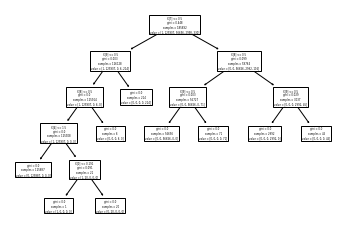

In [40]:
tree.plot_tree(clf) 